In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange (-5.0, 5.0, 0.1)

In [4]:
x.size

100

In [5]:
y = 2*x + 3

In [6]:
y_noise = 2*np.random.normal (size = x.size)

In [7]:
ydata = y+y_noise

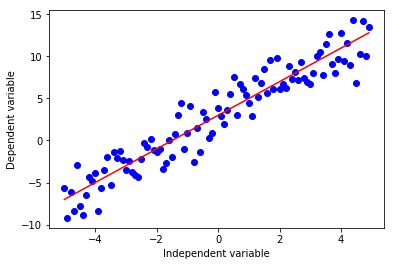

In [11]:
plt.plot (x, ydata, 'bo')
plt.plot (x, y, 'r')
plt.xlabel ('Independent variable')
plt.ylabel ('Dependent variable')
plt.show ()

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

In [27]:
y = 1*(x**3) + 1*(x**2) + 1*x + 3

In [28]:
y_noise = 20*np.random.normal (size = x.size)

In [29]:
ydata = y + y_noise

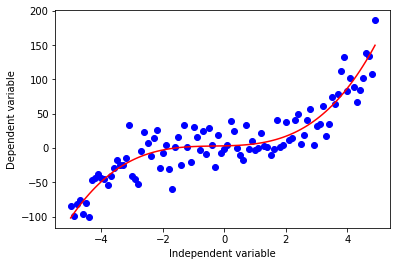

In [30]:
plt.plot (x, ydata, 'bo')
plt.plot (x,y, 'r')
plt.xlabel ('Independent variable')
plt.ylabel ('Dependent variable')
plt.show ()

In [31]:
x = np.arange(-5.0, 5.0, 0.1)

In [32]:
y = np.power (x,2)

In [33]:
y_noise = 2*np.random.normal (size = x.size)

In [34]:
ydata = y + y_noise

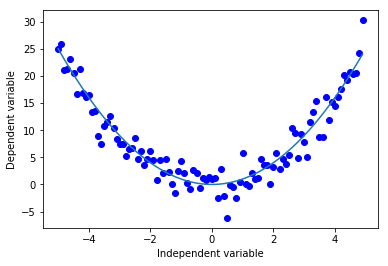

In [36]:
plt.plot (x,ydata, 'bo')
plt.plot (x,y)
plt.xlabel ('Independent variable')
plt.ylabel ('Dependent variable')
plt.show ()

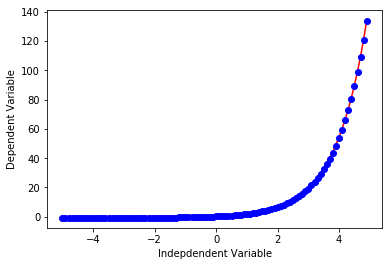

In [40]:
X = np.arange(-5.0, 5.0, 0.1)
X.size
##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)
Y_noise = np.random.normal (X.size)-100
Ydata = Y + Y_noise
plt.plot(X,Y, 'r') 
plt.plot (X, Ydata, 'bo')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


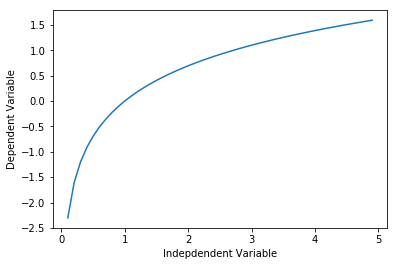

In [44]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

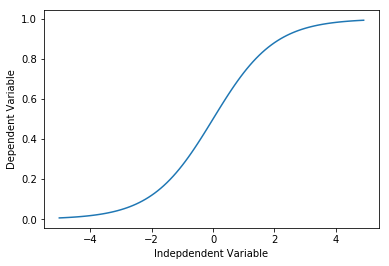

In [42]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1/(1+np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


## China's GDP from 1960 to 2014

In [45]:
import pandas as pd

In [46]:
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-04-06 16:46:37 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [47]:
df = pd.read_csv ('china_gdp.csv')

In [48]:
df.head ()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [82]:
x_data, y_data = (df.Year.values, df.Value.values)

In [83]:
x_data.size

55

In [84]:
y_data.size

55

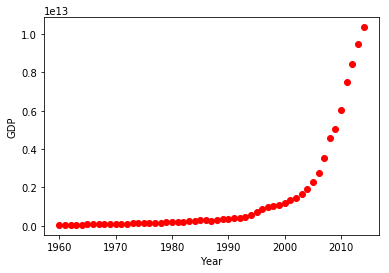

In [85]:
plt.plot (x_data, y_data, 'ro')
plt.xlabel ('Year')
plt.ylabel ('GDP')
plt.show ()

## Building The Model

In [77]:
def sigmoid (x, Beta_1, Beta_2):
    y = 1/ (1 + np.exp (-Beta_1*(x - Beta_2)))
    return y

In [78]:
beta_1 = 0.1
beta_2 = 1990.0

In [79]:
y_pred = sigmoid (x_data, beta_1, beta_2)

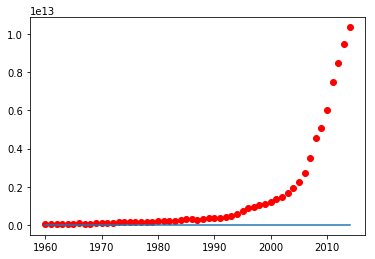

In [88]:
plt.plot (x_data, y_data, 'ro')
plt.plot (x_data, y_pred*15000000000000.)

In [89]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [90]:
from scipy.optimize import curve_fit

In [91]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)

In [93]:
print ('The values of beta_1 and beta_2 are {} and {}'.format (popt[0], popt[1]))

The values of beta_1 and beta_2 are 690.4530171248732 and 0.997207128592685


In [94]:
x = np.linspace (1960, 2015, 55)

In [95]:
x = x/ max (x)

In [96]:
plt.figure (figsize = (8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

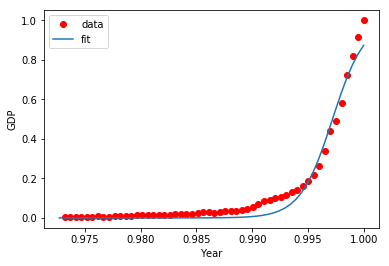

In [97]:
y = sigmoid (x, *popt)
plt.plot (xdata, ydata, 'ro', label = 'data')
plt.plot (x, y, label = 'fit')
plt.legend (loc = 'best')
plt.xlabel ('Year')
plt.ylabel ('GDP')
plt.show ()

## Accuracy